# MACHINE LEARNING PROJECT - WINE QUALITY PREDICTOR
# DEPARTMENT - COMPUTER SCIENCE(DATA SCIENCE)

## Importing Libraries and Setting Up Environment

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Loading and Displaying Data

In [5]:
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Data Visualization: Distribution and Analysis

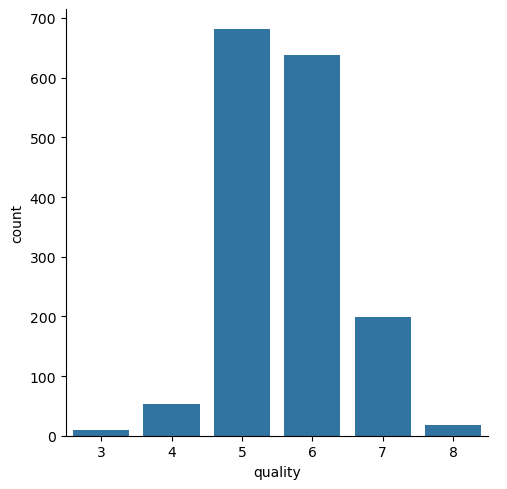

In [11]:
sns.catplot(x='quality',data=df , kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

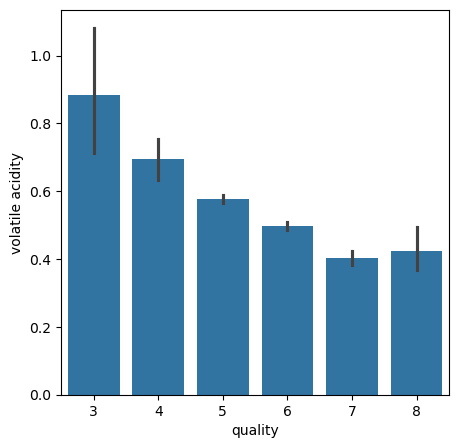

In [12]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=df)

<Axes: xlabel='quality', ylabel='fixed acidity'>

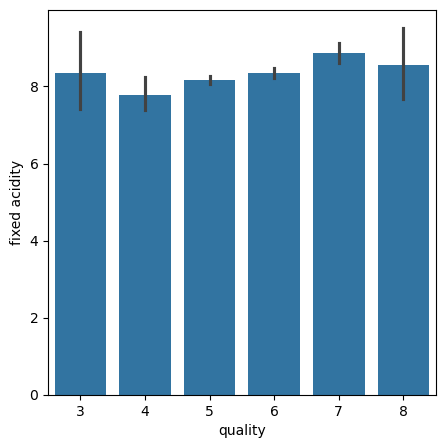

In [13]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='fixed acidity',data=df)

<Axes: xlabel='quality', ylabel='citric acid'>

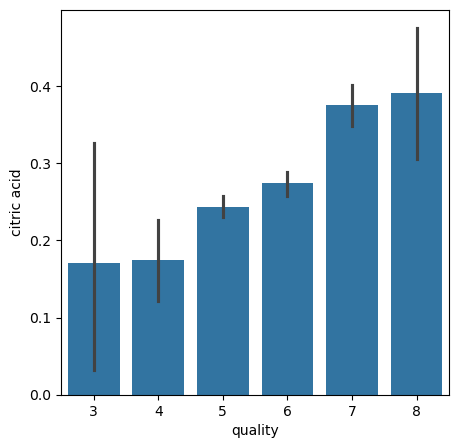

In [14]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data=df)

<Axes: xlabel='quality', ylabel='residual sugar'>

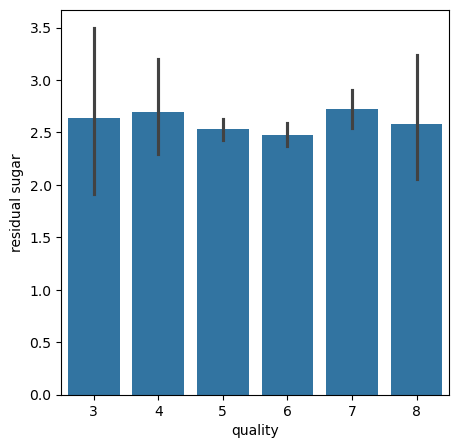

In [15]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='residual sugar',data=df)

<Axes: xlabel='quality', ylabel='density'>

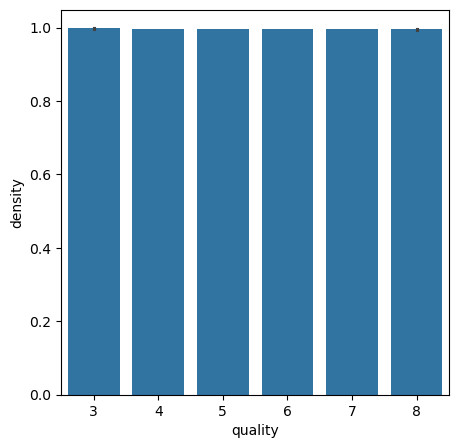

In [16]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='density',data=df)

<Axes: xlabel='quality', ylabel='pH'>

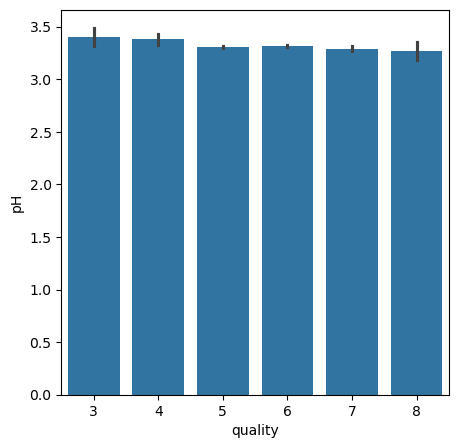

In [17]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='pH',data=df)

<Axes: xlabel='quality', ylabel='sulphates'>

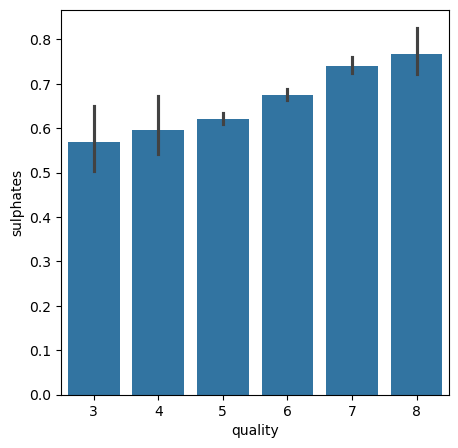

In [18]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='sulphates',data=df)

<Axes: xlabel='quality', ylabel='alcohol'>

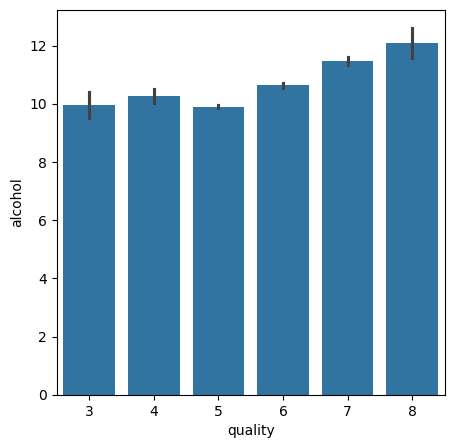

In [19]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='alcohol',data=df)

<Axes: xlabel='quality', ylabel='chlorides'>

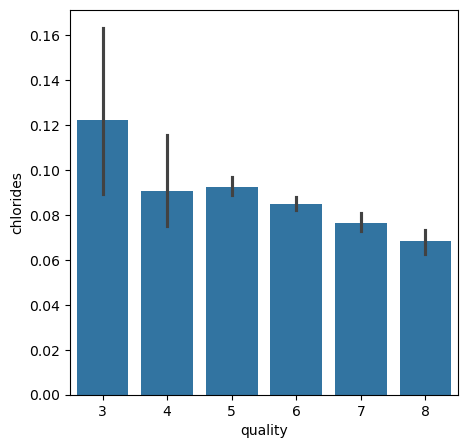

In [20]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='chlorides',data=df)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

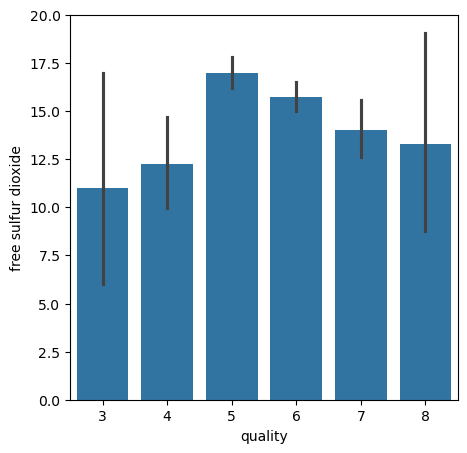

In [21]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='free sulfur dioxide',data=df)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

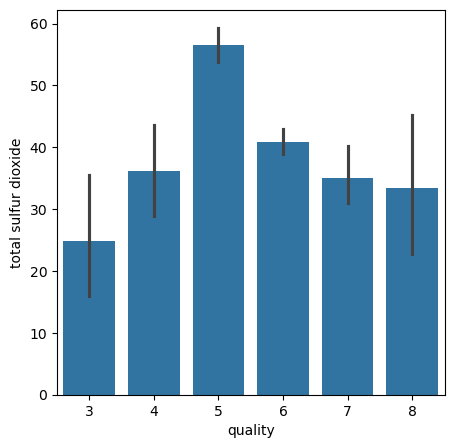

In [22]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='total sulfur dioxide',data=df)

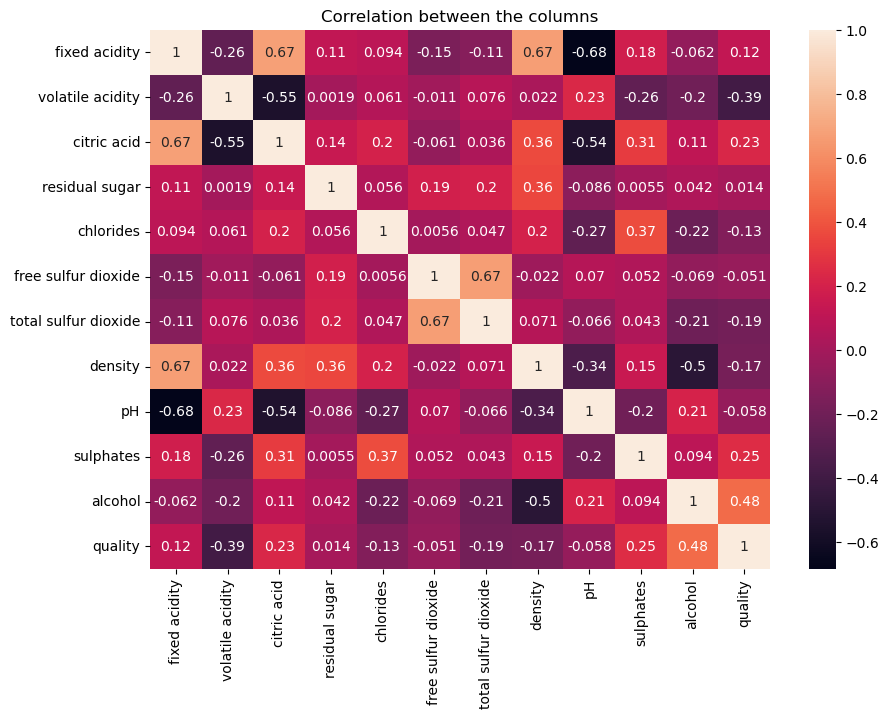

In [23]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

## Data Preprocessing: Feature Selection

In [25]:
df['quality'] = df.quality.apply(lambda x:1 if x>=7 else 0)

In [26]:
df['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

In [27]:
X = df.drop('quality',axis=1)
y = df['quality']

## Splitting Data into Training and Test Sets

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## Selecting Machine Learning Algorithm
### Evaluating Logistic Regression

In [31]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("test accuracy is: {:.2f}%".format(logreg_acc*100))

test accuracy is: 86.25%


In [32]:
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       413
           1       0.52      0.21      0.30        67

    accuracy                           0.86       480
   macro avg       0.70      0.59      0.61       480
weighted avg       0.83      0.86      0.84       480



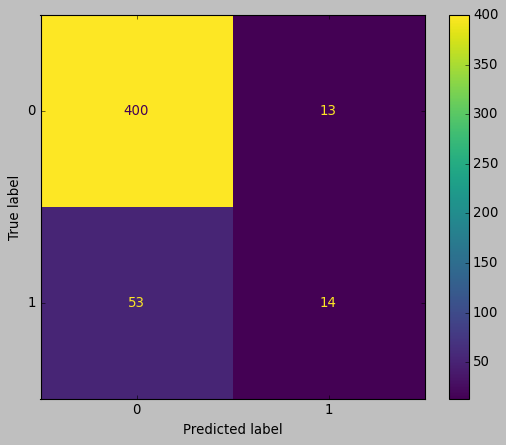

In [33]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=logreg.classes_)
disp.plot()

## Evaluating DecisionTree Classifier

In [35]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
dtree_acc = accuracy_score(dtree_pred, y_test)
print("Test accuracy: {:.2f}%".format(dtree_acc*100))

Test accuracy: 86.67%


In [36]:
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       413
           1       0.52      0.64      0.57        67

    accuracy                           0.87       480
   macro avg       0.73      0.77      0.75       480
weighted avg       0.88      0.87      0.87       480



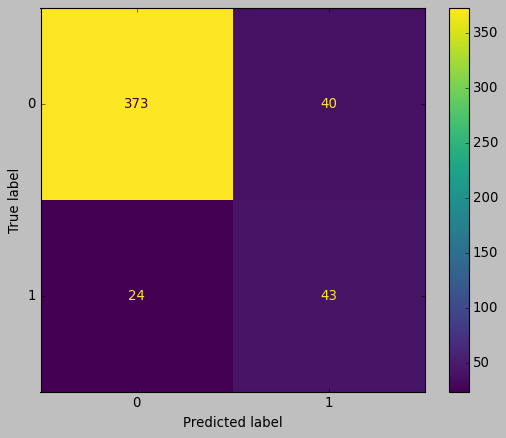

In [37]:
style.use('classic')
cm = confusion_matrix(y_test, dtree_pred, labels=dtree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=dtree.classes_)
disp.plot()

### Evaluating the Random Forest Model

In [39]:
rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)
rforest_pred = rforest.predict(X_test)
rforest_acc = accuracy_score(rforest_pred, y_test)
print("Test accuracy: {:.2f}%".format(rforest_acc*100))

Test accuracy: 88.33%


In [40]:
print(classification_report(y_test, rforest_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       413
           1       0.59      0.52      0.56        67

    accuracy                           0.88       480
   macro avg       0.76      0.73      0.74       480
weighted avg       0.88      0.88      0.88       480



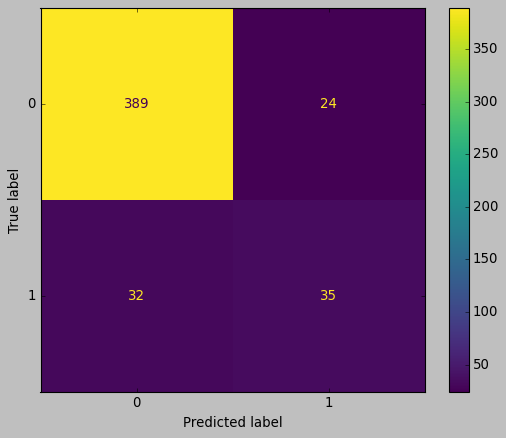

In [41]:
style.use('classic')
cm = confusion_matrix(y_test, rforest_pred, labels=rforest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=rforest.classes_)
disp.plot()

## ROC-AUC Curve

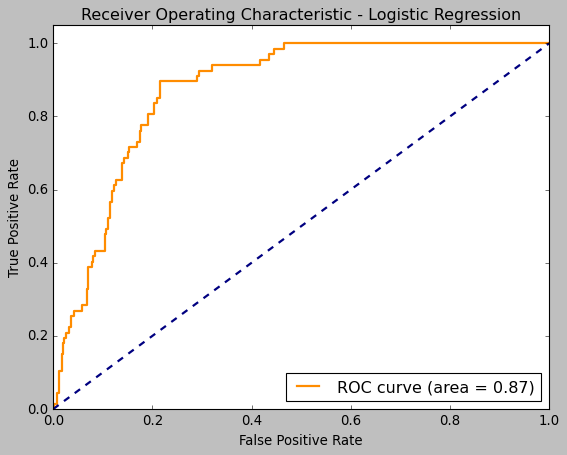

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for the positive class
logreg_probs = logreg.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, logreg_probs)
roc_auc = roc_auc_score(y_test, logreg_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

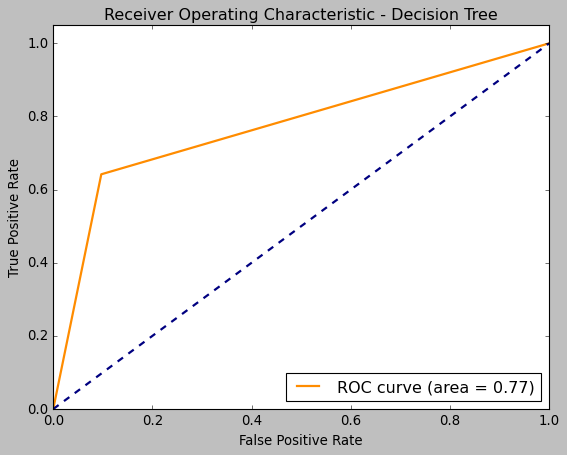

In [44]:
# Predict probabilities for the positive class
dtree_probs = dtree.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_dtree, tpr_dtree, thresholds_dtree = roc_curve(y_test, dtree_probs)
roc_auc_dtree = roc_auc_score(y_test, dtree_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dtree, tpr_dtree, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_dtree)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Decision Tree')
plt.legend(loc="lower right")
plt.show()

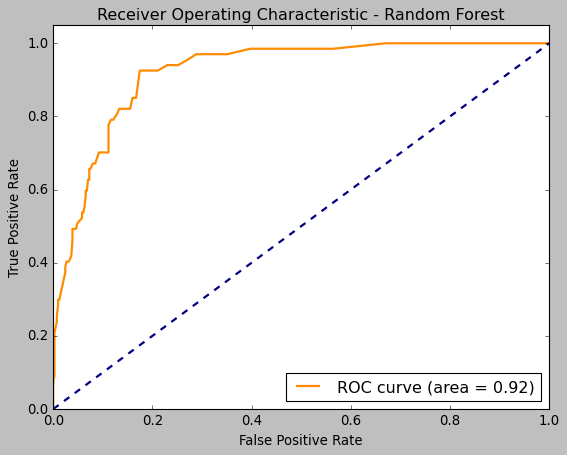

In [45]:
# Predict probabilities for the positive class
rforest_probs = rforest.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_rforest, tpr_rforest, thresholds_rforest = roc_curve(y_test, rforest_probs)
roc_auc_rforest = roc_auc_score(y_test, rforest_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rforest, tpr_rforest, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rforest)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc="lower right")
plt.show()

## Comparison

In [47]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree' ,'Random Forest'],
    'Score': ['86.88%','86.25%','88.96%']})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
88.96%,Random Forest
86.88%,Logistic Regression
86.25%,Decision Tree
